In [2]:
import pandas as pd
import nltk
import regex as re
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_india_cleaned.csv")

In [4]:
data.shape

(17649, 4)

In [5]:
data['content'][5]

'@khetawat_akshat think about better things like global warming…'

# Data Exploration

In [6]:
# checking duplicates if there are retweets
data['content'].duplicated().sum()


211

In [7]:
# dropping duplicate tweets based on Text coloumn
data = data.drop_duplicates(subset=['content'], keep='first')

In [8]:
data.shape

(17438, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17438 entries, 0 to 17648
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  17438 non-null  object
 1   place    17438 non-null  object
 2   year     17438 non-null  int64 
 3   month    17438 non-null  object
dtypes: int64(1), object(3)
memory usage: 681.2+ KB


# Text preprocessing

In [15]:
# converting text into lower case
data['content'] = data['content'].str.lower()

In [16]:
# removing twitter mentions(@, #, punctuations) from the tweets
data['content'] = data['content'].str.replace("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", '', regex = True)

In [17]:
# removing hyperlinks from the tweets
data['content'] = data['content'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',regex = True)

In [18]:
data['content'][4]

'climate change is not a science it is a religion created by the same people who use religion to do atrocities without being seen        the narrative of manmade global warming is the perfect storm of demons and dangers '

In [19]:
# emoji removal
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,content,place,year,month
0,as districts in continue to be affected by ma...,India,2022,August
1,happiest birthday to jeon freakin man is the ...,India,2022,August
2,but they dont have the money to support the de...,India,2022,August
3,volunteer with us for visit,India,2022,August
4,climate change is not a science it is a religi...,India,2022,August
...,...,...,...,...
17644,good morning surat is truly affected by global...,India,2010,October
17645,we are alrdy facing global warming here,India,2010,October
17646,rt global warming the archaeological frontier,India,2010,October
17647,global warming global warming,India,2010,October


In [20]:
data['content'][3]

'volunteer with us for   visit              '

In [21]:
#tweets_combined.to_csv("combine_tweet_2019_2022(with_stopwords).csv",index = False)

In [22]:
# removing stopwords using ntlk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop = (stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# adding stop words to the existing list
new_stopwords = ["isnt", "dont", "maam", "according", "u", "climate change", "global warming", "know","climate", "change", "warming","global","say", "go", "use", "said", "warmingchange", "warmingclimate","changeglobal","warming change", "thats","us", "see","via","may"]
stop.extend(new_stopwords)

In [24]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
# removing stopwords
data['content']  = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [26]:
data.head()

,content,place,year,month
0,districts continue affected massive unpreceden...,India,2022,August
1,happiest birthday jeon freakin man cause,India,2022,August
2,money support developing countries cope advers...,India,2022,August
3,volunteer visit,India,2022,August
4,science religion created people religion atroc...,India,2022,August


In [27]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data['content_token'] = data['content'].apply(word_tokenize)

In [29]:
data

,content,place,year,month,content_token
0,districts continue affected massive unpreceden...,India,2022,August,"[districts, continue, affected, massive, unpre..."
1,happiest birthday jeon freakin man cause,India,2022,August,"[happiest, birthday, jeon, freakin, man, cause]"
2,money support developing countries cope advers...,India,2022,August,"[money, support, developing, countries, cope, ..."
3,volunteer visit,India,2022,August,"[volunteer, visit]"
4,science religion created people religion atroc...,India,2022,August,"[science, religion, created, people, religion,..."
...,...,...,...,...,...
17644,good morning surat truly affected mnpinfotech,India,2010,October,"[good, morning, surat, truly, affected, mnpinf..."
17645,alrdy facing,India,2010,October,"[alrdy, facing]"
17646,rt archaeological frontier,India,2010,October,"[rt, archaeological, frontier]"
17647,,India,2010,October,[]


In [30]:
data.to_csv("data_india_cleaned_tokenized.csv", index = False)

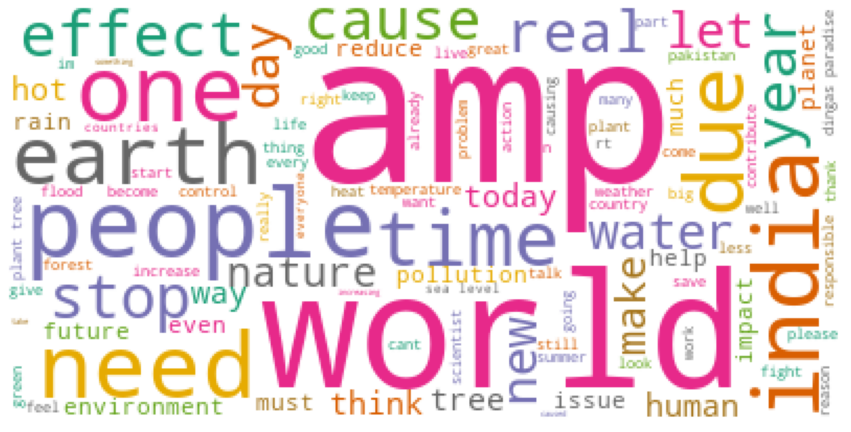

In [31]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

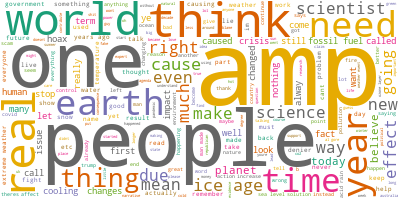

In [466]:
wordcloud.to_image()